In [21]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [35]:
train_label_dir = './coco/labels/train2017'
df = pd.DataFrame()
all_classes = []
for file in os.listdir(train_label_dir):
    path = os.path.join(train_label_dir, file)
    with open(path) as f:
        classlist = []

        for line in f:
            vals = line.split(' ')
            numboxes = (len(vals)-1) // 4
            for _ in range(numboxes):
                classlist.append(int(vals[0]))
        all_classes.extend(classlist)

In [36]:
all_classes = sorted(all_classes)

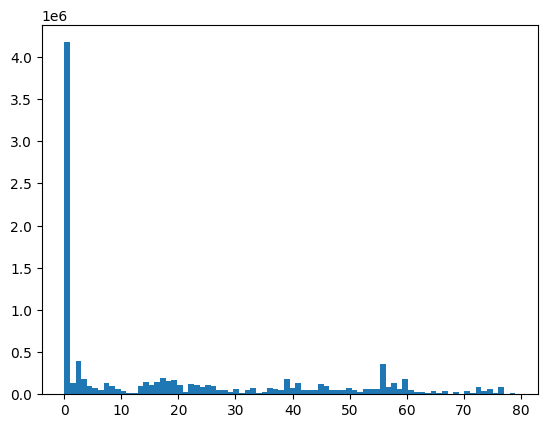

In [37]:
plt.hist(all_classes, bins=80)
plt.show()